## 중국 2023년 1분기 매출, 영업이익 예측하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


In [4]:
CGV_china = pd.DataFrame({
    "2022_4Q" : [144, 1149, 42.7, 1.4, 53.5, 341, -123, 145],
    "2022_3Q" : [145, 1158, 85, 2.2, 50.1, 516, -196, 81],
    "2022_2Q" : [146, 1165, 32, 1, 46.3, 234, -283, -3],
    "2022_1Q" : [146, 1165, 140, 3.0, 49.8, 656, -118, 155],
    "2021_4Q" : [146, 1166, 121.6, 3.4, 48.8, 707, -84, 185],
    "2021_3Q" : [142, 1135, 73, 2.0, 43.3, 512, -174, 88],
    "2021_2Q" : [141, 1126, 94.7, 3.0, 40.9, 656, -16, 248],
    "2021_1Q" : [145, 1155, 181, 4.7, 47.2, 908, 23, 288],
    "2020_4Q" : [148, 1175, 120.1, 3.4, 40.2, 681, 5, 267],
    "2020_3Q" : [144, 1140, 55, 1.8, 38.0, 359, -191, 80],
    "2020_2Q" : [139, 1095, 0, 0, 43.2, 8, -298, 29],
    "2020_1Q" : [140, 1103, 21, 0.6, 37.4, 158, -354, -60],
    "2019_4Q" : [141, 1116, 150, 4.3, 41.9, 886, 38, 325],
    "2019_3Q" : [134, 1059, 155, 4.5, 39.5, 925, 33, 273],
    "2019_2Q" : [125, 991, 117, 3.96, 45.6, 847, 19, 248],
    "2019_1Q" : [120, 949, 172, 4.84, 44.4, 1099, 118, 343]
})

CGV_china.index = ["site", "screen", "bo_cn", "bo_cgv_cn", "atp_cn", "revenue", "op", "EBITDA"]


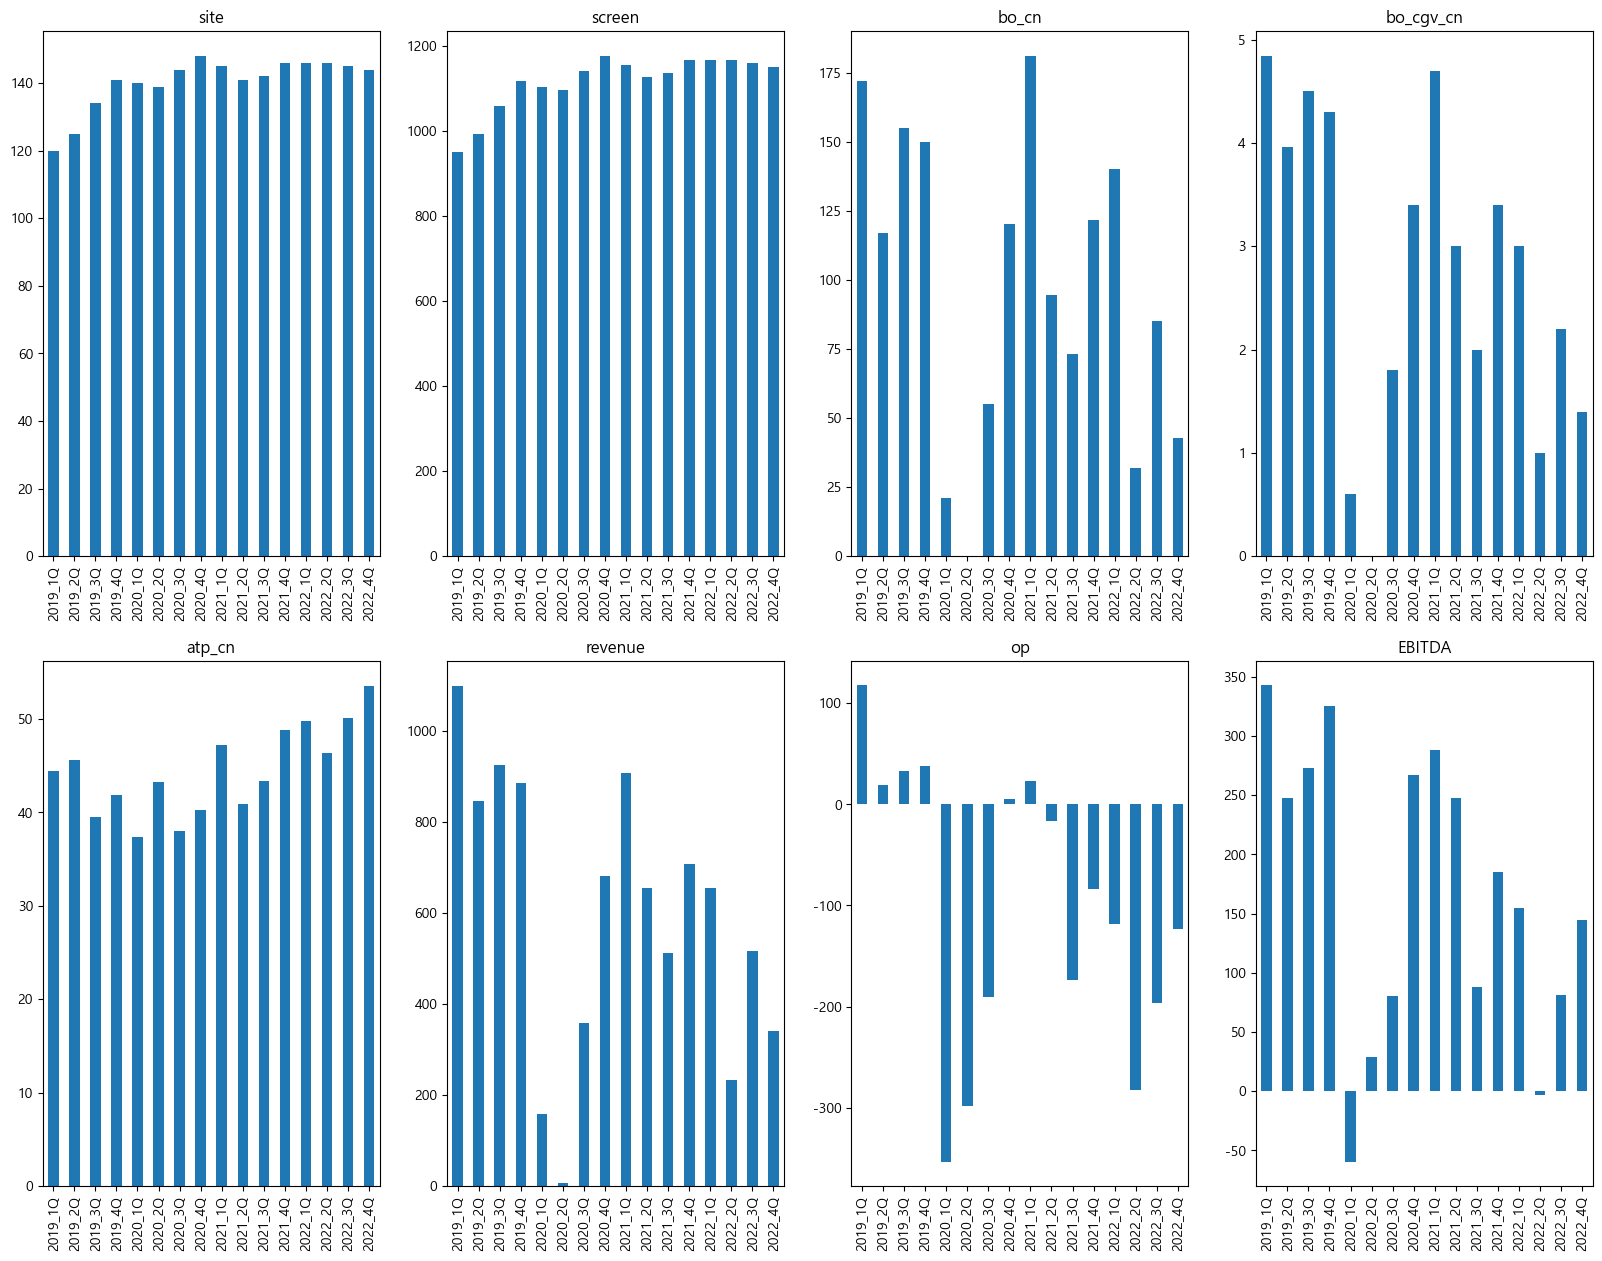

In [5]:
df = CGV_china[CGV_china.columns[::-1]]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (20, 15))

for i in range(8):
    df.iloc[i].plot.bar(ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(df.index[i])

### 아웃라이어 제거(코로나 시국)

In [7]:
idx =df.columns.tolist()
remove_list = ["2020_1Q", "2020_2Q", "2020_3Q", "2022_3Q"]
new_idx = [x for x in idx if x not in remove_list]
print(new_idx)

['2019_1Q', '2019_2Q', '2019_3Q', '2019_4Q', '2020_4Q', '2021_1Q', '2021_2Q', '2021_3Q', '2021_4Q', '2022_1Q', '2022_2Q', '2022_4Q']


### 상관관계 확인

In [8]:
df[new_idx].T.corr()

,site,screen,bo_cn,bo_cgv_cn,atp_cn,revenue,op,EBITDA
site,1.000000,0.998816,-0.360328,-0.513562,0.218783,-0.619970,-0.591295,-0.483421
screen,0.998816,1.000000,-0.382987,-0.537477,0.242511,-0.639895,-0.614179,-0.509053
bo_cn,-0.360328,-0.382987,1.000000,0.957569,-0.295865,0.937131,0.817665,0.828119
bo_cgv_cn,-0.513562,-0.537477,0.957569,1.000000,-0.406907,0.984927,0.916053,0.910512
atp_cn,0.218783,0.242511,-0.295865,-0.406907,1.000000,-0.404785,-0.420496,-0.418256
revenue,-0.619970,-0.639895,0.937131,0.984927,-0.404785,1.000000,0.922940,0.902811
op,-0.591295,-0.614179,0.817665,0.916053,-0.420496,0.922940,1.000000,0.987866
EBITDA,-0.483421,-0.509053,0.828119,0.910512,-0.418256,0.902811,0.987866,1.000000


### Linear Regression

In [28]:
df

,2019_1Q,2019_2Q,2019_3Q,2019_4Q,2020_1Q,2020_2Q,2020_3Q,2020_4Q,2021_1Q,2021_2Q,2021_3Q,2021_4Q,2022_1Q,2022_2Q,2022_3Q,2022_4Q
site,120.00,125.00,134.0,141.0,140.0,139.0,144.0,148.0,145.0,141.0,142.0,146.0,146.0,146.0,145.0,144.0
screen,949.00,991.00,1059.0,1116.0,1103.0,1095.0,1140.0,1175.0,1155.0,1126.0,1135.0,1166.0,1165.0,1165.0,1158.0,1149.0
bo_cn,172.00,117.00,155.0,150.0,21.0,0.0,55.0,120.1,181.0,94.7,73.0,121.6,140.0,32.0,85.0,42.7
bo_cgv_cn,4.84,3.96,4.5,4.3,0.6,0.0,1.8,3.4,4.7,3.0,2.0,3.4,3.0,1.0,2.2,1.4
atp_cn,44.40,45.60,39.5,41.9,37.4,43.2,38.0,40.2,47.2,40.9,43.3,48.8,49.8,46.3,50.1,53.5
revenue,1099.00,847.00,925.0,886.0,158.0,8.0,359.0,681.0,908.0,656.0,512.0,707.0,656.0,234.0,516.0,341.0
op,118.00,19.00,33.0,38.0,-354.0,-298.0,-191.0,5.0,23.0,-16.0,-174.0,-84.0,-118.0,-283.0,-196.0,-123.0
EBITDA,343.00,248.00,273.0,325.0,-60.0,29.0,80.0,267.0,288.0,248.0,88.0,185.0,155.0,-3.0,81.0,145.0


In [26]:
from sklearn.linear_model import LinearRegression

X = df.loc["bo_cn"].tolist()
Y = df.loc["revenue"].tolist()

corr = df.T.corr()
slope = corr.loc['bo_cn', 'revenue'] * df.T["revenue"].std()/df.T["bo_cn"].std()
intercept = df.T['revenue'].mean() - slope * df.T['bo_cn'].mean()
print(f'slope: {slope}, intercept: {intercept}')

slope: 5.3348406372727775, intercept: 73.13219511192119


In [39]:
data = [[x] for x in X]
print(data)

[[172.0], [117.0], [155.0], [150.0], [21.0], [0.0], [55.0], [120.1], [181.0], [94.7], [73.0], [121.6], [140.0], [32.0], [85.0], [42.7]]


In [40]:
model = LinearRegression()
X = df.loc["bo_cn"].tolist()
X = [[x] for x in X]
Y = df.loc["revenue"].tolist()
Y = [[y] for y in Y]

model.fit(X, Y)

LinearRegression()

In [29]:
5.338 * 158.58 + 73.132

919.6320400000002

Text(145, 950, '2023 1분기')

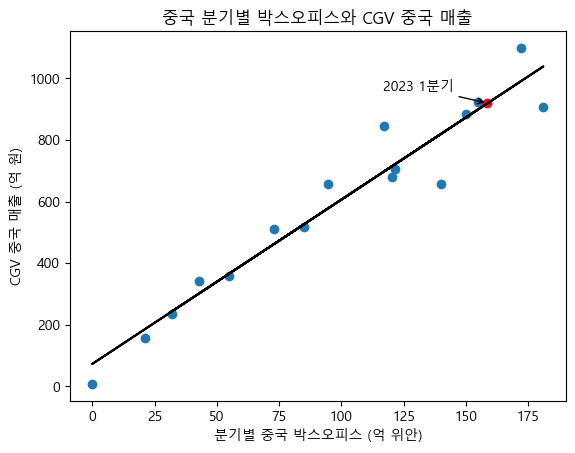

In [63]:
plt.title("중국 분기별 박스오피스와 CGV 중국 매출")

plt.plot(X, model.predict(X), color = "black")
plt.scatter(df.T["bo_cn"], df.T["revenue"])
plt.scatter(158.58, 919.632, color = 'red', label = "2023 1분기")
plt.xlabel("분기별 중국 박스오피스 (억 위안)")
plt.ylabel("CGV 중국 매출 (억 원)")
plt.annotate("2023 1분기", xy=(158.58, 919.632), xytext=(145, 950),
                 ha='right',
                 va='bottom',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))